In [1]:
# Step 1: Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Step 2: Load the data from the external CSV file into a Pandas DataFrame
file_path = 'data.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv('../simple_pub_sub_py.csv')


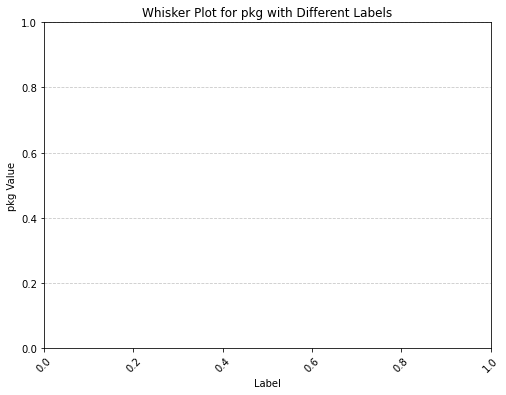

In [5]:
# Step 3: Create the Whisker Plot
plt.figure(figsize=(8, 6))
plt.title('Whisker Plot for pkg with Different Labels')
plt.xlabel('Label')
plt.ylabel('pkg Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

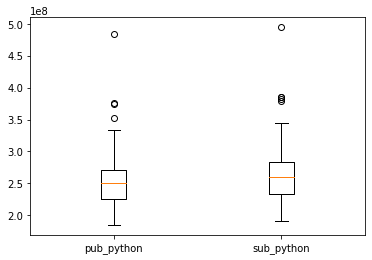

In [8]:
# Create the whisker plot
plt.boxplot([df[df['label'] == 'pub_py']['pkg'], df[df['label'] == 'sub_py']['pkg']], labels=['pub_python', 'sub_python'])

# Show the plot
plt.show()

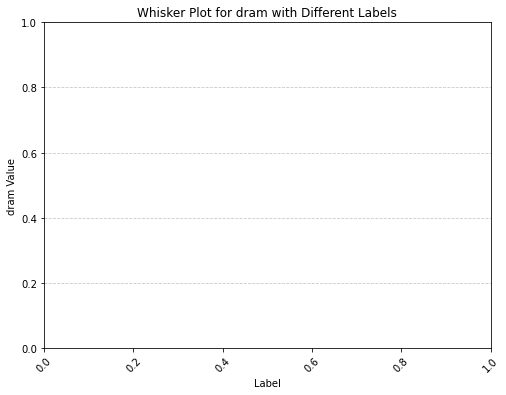

In [10]:
# Step 3: Create the Whisker Plot for the "dram" column
plt.figure(figsize=(8, 6))
plt.title('Whisker Plot for dram with Different Labels')
plt.xlabel('Label')
plt.ylabel('dram Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

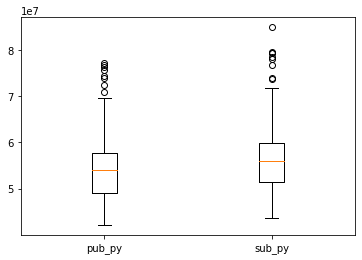

In [11]:
# Create the whisker plot
plt.boxplot([df[df['label'] == 'pub_py']['dram'], df[df['label'] == 'sub_py']['dram']], labels=['pub_py', 'sub_py'])

# Show the plot
plt.show()